In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
data = pd.read_csv('Womens_Clothing_E-Commerce_Reviews.csv')
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
# dataset size
data.size

258346

In [4]:
data.shape
(23486, 11)

(23486, 11)

In [5]:
# List of features
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
# features information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [7]:
# 5 number summary of features
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
# Describing the object features 
data.describe(include=object)

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


# EDA

In our business plan, we set our research question - XX , therefore we would like to focus on sentiment analysis, devide it into 3 different groups - positive, negative and neutral and to see if there is any correlation between the lenght of the review text and our independent variable. Analysing the data, we have decided for our X to be Age, Recommended IND, Positive Feedback Count and Class Name ( we decided for Class Name as Division Name and Departmant Name hold same values as Class Name. The rest of the features we will drop as we won't need them in our further data prep for machine learning.

The first thing we need to do is to check for duplicates and missing values, drop any features that have no use to us and check for correlaction between our features.

## Checking for duplicates

In [9]:
# store duplicated entries to be examined
data_dupes = data[data.duplicated()] 
print("number of duplicate rows: ", data_dupes.shape)

number of duplicate rows:  (0, 11)


 - We don't have any duplicated values

## Checking for missing values

In [10]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

- We can see that 5 of our features have missing values, we will look into each of the feature in detail and see what we can do 

<Figure size 720x432 with 0 Axes>

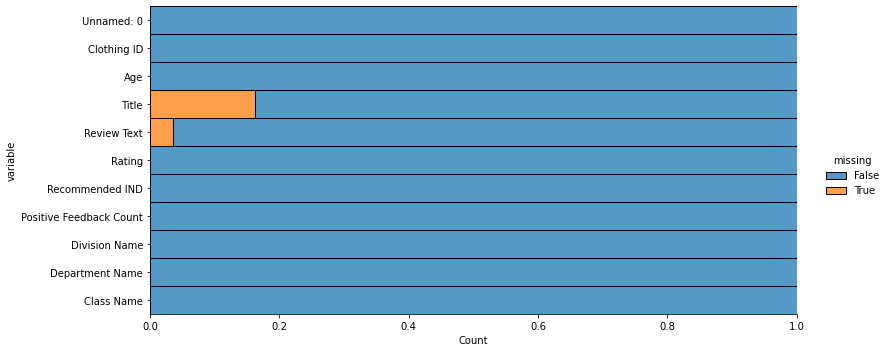

In [11]:
# Plotting the missing values over the data to see what portion of the values are missing

plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2.3
)

Our threshold for missing values is 5%. Any feature with greater than 5% missing data can be removed from the dataset.

- <b>Title</b> & <b>Review Text</b> both appear to have significant missing data.
- Will need to check how large this significance is

In [12]:
# Calculating percentage of missing data
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'percent_missing': percent_missing})

missing_value_data

,percent_missing
Unnamed: 0,0.000000
Clothing ID,0.000000
Age,0.000000
Title,16.222430
Review Text,3.597888
Rating,0.000000
Recommended IND,0.000000
Positive Feedback Count,0.000000
Division Name,0.059610
Department Name,0.059610


- <b> Title </b> has 16.22% of its data missing. A significant portion of that feature is null values. Refering back to the data dictionary we can see that this feature refers to the Heading Title of the review. NLP can be used to extract sentiment from this feature but with more than 16% of it being missing data it might be better to drop this feature. The logic being that the Title is just a summary of the actual review. The review text can express more accurate sentiment and has no word count limit compared to the Title feature which can limit the feedback a customer can express for a certain item.
<br>

- <b> Review_Text </b> only has 3.6% missing data. This implies that a customer left a review but didnt leave any comment regarding the product. As the missing values are less than 5% we do not need to remove this column. 
<br>

- <b> Division, Department and Class Name </b> also have missing values. However, it's less than 5%, therefore we won't need to drop it. We should still look into imputing the missing data.
<br>

## Dropping columns

In [13]:
# Dropping columns that has no use to us
df = data.drop(['Unnamed: 0', 'Title' ], axis=1)
df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


- We decided to drop 2 of our columns - Title and Unnamed: 0, Title as there are more than 5% of missing values, also it doesn't give us any significant information. Unnamed: 0 is just the same values as our entries

- The next step now is to impute missing data, starting with Review Text, followed by Division Name, Department Name and Class Name     

## Imputing missing values

In [14]:
# Checking missing value
missing_review = df[df['Review Text'].isna()]
missing_review

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,861,23,NaN,5,1,0,General Petite,Tops,Knits
93,1081,31,NaN,5,1,0,General,Dresses,Dresses
98,1133,50,NaN,5,1,0,General,Jackets,Outerwear
135,861,35,NaN,4,1,0,General Petite,Tops,Knits
142,1126,35,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,4,1,0,General,Tops,Knits
23301,862,52,NaN,5,1,0,General,Tops,Knits
23303,823,46,NaN,5,1,0,General,Tops,Blouses
23470,1104,39,NaN,5,1,0,General Petite,Dresses,Dresses


- We have 845 missing values, which as it was already mnetioned, makes up of 3.6% of the missing values. As our rationale is to find out whether there is any correlation between the lengts of the text and ?????, it wouldn't be right to impute it with text. As in our next step we will be performing machine learning, we will impute the missing value with empty string.

In [15]:
# Imputing our data with an empty string
df['Review Text'] = df['Review Text'].fillna(' ')
df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [16]:
df['Review Text'].tail(50)

23436    I'm 5'6" and it hits me at mid-thigh. the top ...
23437    This dress is so cute in the photo and fit tru...
23438    I feel like snagging a pair of these was the e...
23439    Love this print and fabric! its soft and comfy...
23440    I tried on this dress in the store and was ple...
23441    Don't know why but i didn't have high expectat...
23442    Love this dress, very flattering fit and the f...
23443    Love this cardigan as a wardrobe staple to qui...
23444    As per usual bordeaux is perfect with this car...
23445    I love this jacket so much, i bought two. it g...
23446    This tee is amazing. it's light weight and per...
23447    I really wanted to like this dress and was enc...
23448    I like the contrast of the skirt with the bodi...
23449    I tried these on because the color is really p...
23450    I wanted to love this jacket. so soft and grea...
23451    I recently purchased this dress at my local re...
23452    I ordered this skirt hoping i could wear it to.

- We can see that we don't have missing values in our dataset anymore and it was replaced with an empty string

In [17]:
# Double-checking for missing values
df['Review Text'].isna().sum()

0

In [18]:
# Checking for the other missing values
df.isna().sum()

Clothing ID                 0
Age                         0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              14
Department Name            14
Class Name                 14
dtype: int64

In [19]:
# Checking missing value
missing_division = df[df['Division Name'].isna()]
missing_division

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,492,48,,5,1,0,NaN,NaN,NaN
16216,152,36,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


In [20]:
# Number of missing values
missing_division.shape

(14, 9)

- We can see that Division Name, Department Name and Class Name have exactly the same values missing. We could impute them as we know the Clothing ID, but since it's only 14 values which makes up 0.06% missing values of the whole data, we can drop them.

In [21]:
df.isna().sum()

Clothing ID                 0
Age                         0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              14
Department Name            14
Class Name                 14
dtype: int64

In [22]:
# Dropping all rows with at least one NaN
new_df = df.dropna(axis = 0, how ='any')  

In [23]:
# Double-checking for missing values
new_df.isna().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

- Now that we managed all our missing values, we will look closely on Division, Departmet and Class Name to see if we could potentially drop more columns

In [24]:
# Uniques Values
new_df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite'], dtype=object)

In [25]:
# Uniques Values
new_df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'],
      dtype=object)

In [26]:
# Uniques Values
new_df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

- Out of all these 3 categories, Class Name is the most specific which could give us some interesting inside, therefore we will drop the Division Name and Department Name. We can also drop the feature Clothing ID as it only tell us the number rather than what it actually is.

In [27]:
# Dropping columns that has no use to us
df1 = new_df.drop(['Division Name' , 'Department Name', 'Clothing ID'], axis=1)
df1

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,Blouses
...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,Dresses
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,Knits
23483,31,"This fit well, but the top was very see throug...",3,0,1,Dresses
23484,28,I bought this dress for a wedding i have this ...,3,1,2,Dresses


## Data visualization

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Rating'}>],
       [<AxesSubplot:title={'center':'Recommended IND'}>,
        <AxesSubplot:title={'center':'Positive Feedback Count'}>]],
      dtype=object)

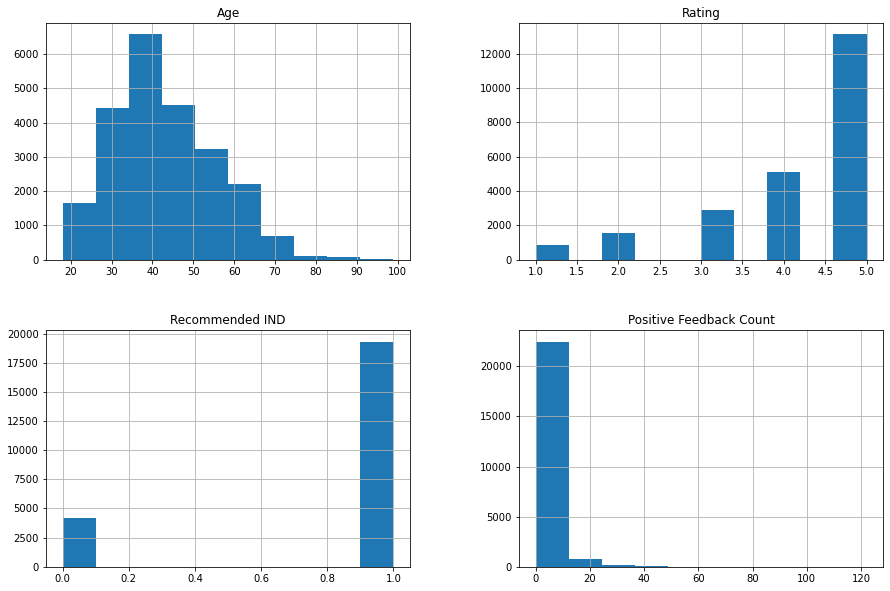

In [28]:
# Histograms
df1.hist(figsize=(15,10))

- We can clearly see from our histograms, that customers mostly rated our products high and that are happy with our products. The most frequent age of customers is somewhere between the age of 30-50. To have better idea, we will dig a bit more deeper.

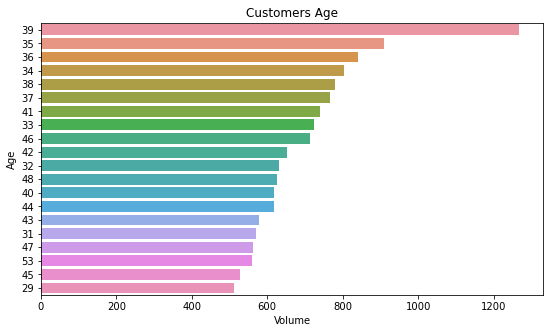

In [29]:
# Ascending order of Age of our Customers
age_order = df1['Age'].value_counts().head(20).index
plt.figure(figsize=(9, 5))
sns.countplot(data=df1, y='Age', order=age_order)
plt.title('Customers Age')
plt.xlabel('Volume')
plt.ylabel('Age');

In [30]:
# Frequency of the age
df1['Age'].value_counts()

39    1268
35     909
36     840
34     803
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64

- 1268 of our customers are in the age of 39, followed by 35 with the frequency of 909 and on the third spot are customers in a age of 36 with the frequency of 840.

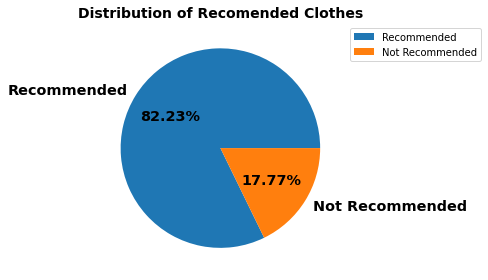

In [31]:
# Pie chart of distribution of Recommended Clothes
plt.figure(figsize = (6,4))
x = df1['Recommended IND'].value_counts()
labels = 'Recommended','Not Recommended'
plt.pie(x = x,  labels = labels,
        autopct = '%.2f%%', 
        textprops = {'size' : 'x-large',
                   'fontweight' : 'bold'})
plt.title('Distribution of Recomended Clothes', fontsize = 14, fontweight = 'bold')
plt.legend(labels, loc="upper left", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

- This pie chart shows us that 82.23% of are customers would recommended our brand

In [32]:
# Checking how many clothing items our feature has
df1['Class Name'].unique().shape

(20,)

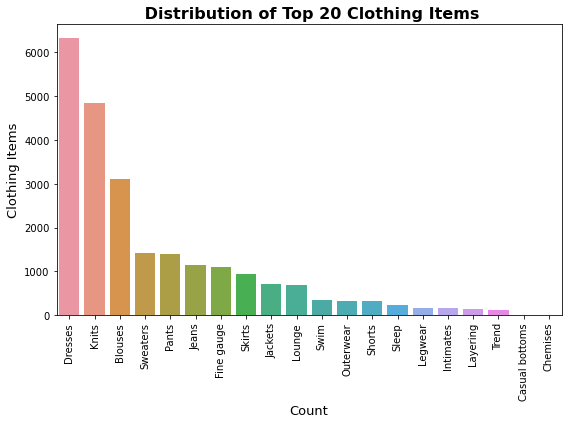

In [33]:
# Ascdening order of our most !!!!SELLING!!!!!! items
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Class Name', data = df1, 
                   order = df1['Class Name'].value_counts().index[:20])
plt.title(' Distribution of Top 20 Clothing Items', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count', fontsize = 13)
plt.xticks(rotation=90)
plt.ylabel('Clothing Items', fontsize = 13)
plt.tight_layout()
plt.show()

- From our graph we can see that our mose selling items are Dresses, Knits and Blouses as the top 3, followed by Sweaters and pants as our top 5

In [34]:
# Top 5 of our selling items
top5 = df1['Class Name'].value_counts().index[:5]
top5

Index(['Dresses', 'Knits', 'Blouses', 'Sweaters', 'Pants'], dtype='object')

Text(0.5, 1.0, 'Ratings of the clothes')

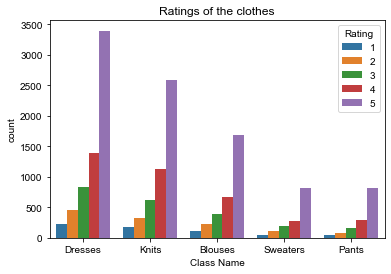

In [35]:
# Ratings of our top 5 items
sns.countplot(x="Class Name", hue="Rating", data=df1,
              order = df1['Class Name'].value_counts().index[:5])
sns.set(rc={'figure.figsize':(20,10)})
plt.title("Ratings of the clothes")

- We can clearly see that all the top 5 items are rating extremely positively, compare to the lowest point

In [36]:
df_cat = df1[['Class Name']]

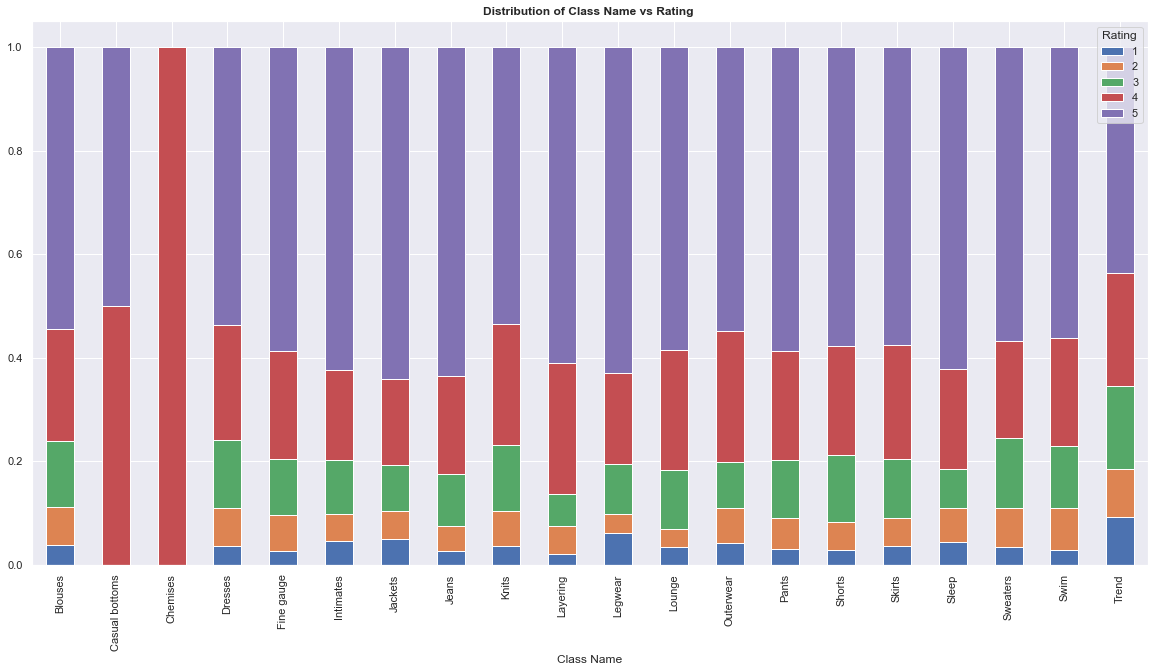

In [37]:
# Stacked bar visualization
for x in df_cat:
    y = pd.crosstab(df1[x],df1['Rating'])
    y.div(y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title("Distribution of {} vs Rating ".format(x), fontsize=12, fontweight='bold')

In [38]:
df1['Positive Feedback Count'].value_counts()

0      11165
1       4041
2       2193
3       1433
4        922
       ...  
94         1
117        1
71         1
84         1
59         1
Name: Positive Feedback Count, Length: 82, dtype: int64

In [39]:
df1['Positive Feedback Count'].unique().shape

(82,)

## Correlation between each variable

Text(0.5, 1.0, 'Correlation between different variables')

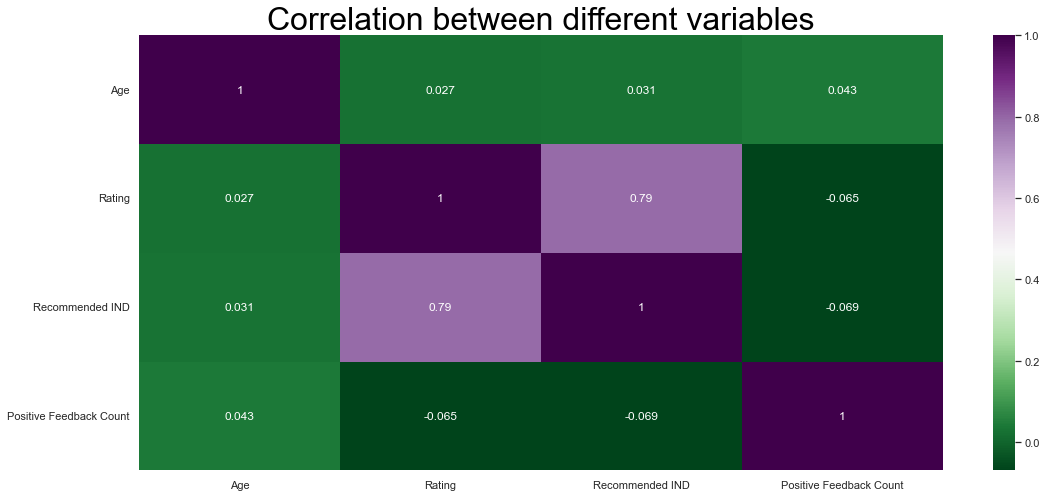

In [40]:
# Visualizating correlation between variables
fig, ax = plt.subplots(figsize=(18,8))    
sns.heatmap(df1.corr() ,annot=True ,cmap='PRGn_r')
plt.title('Correlation between different variables', fontsize = 32, c='black')

- We can see that there is correlation between Rating and Recommended IND. However, on the other hand, age doesn't play a big role when it comes to rating of the product.

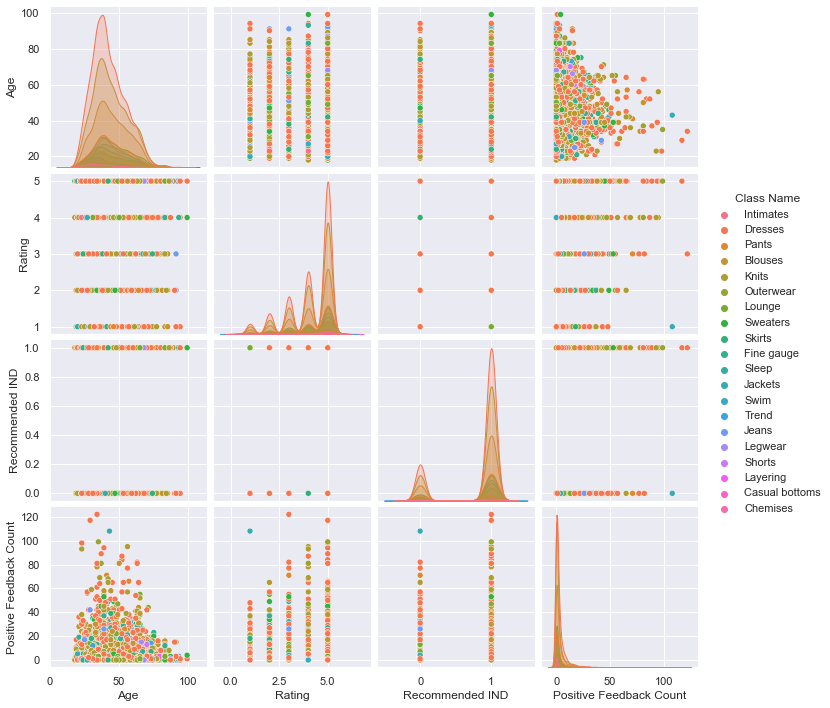

In [41]:
sns.pairplot(df1, hue = 'Class Name')

</br>

### Reviewing Text Lenght, Age and Sentiment Correlations

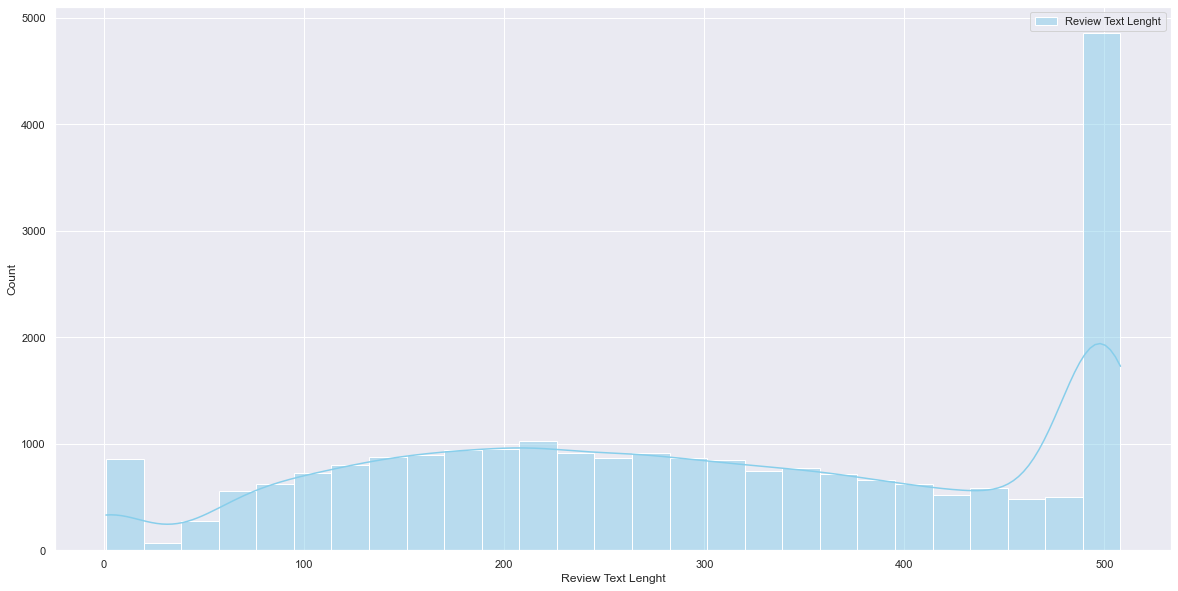

In [180]:
sns.histplot(data=df_new, x=df_new['Review Text Lenght'], color="skyblue", label="Review Text Lenght", kde=True)
plt.legend() 
plt.show()

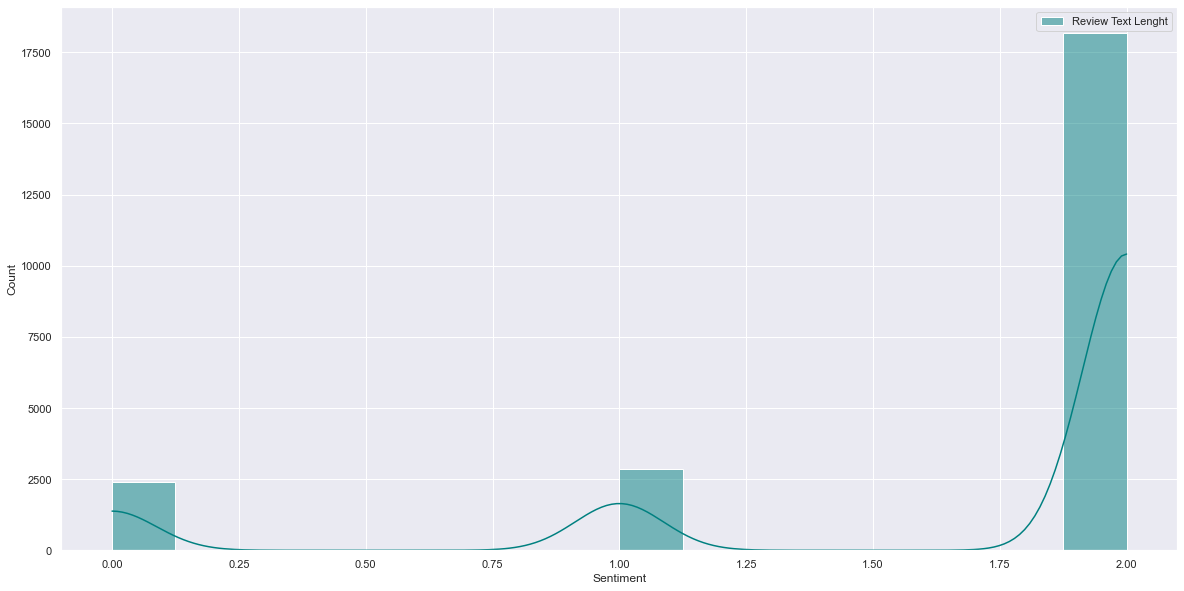

In [179]:
sns.histplot(data=df_new, x=df_new['Sentiment'], color="teal", label="Review Text Lenght", kde=True)
plt.legend() 
plt.show()

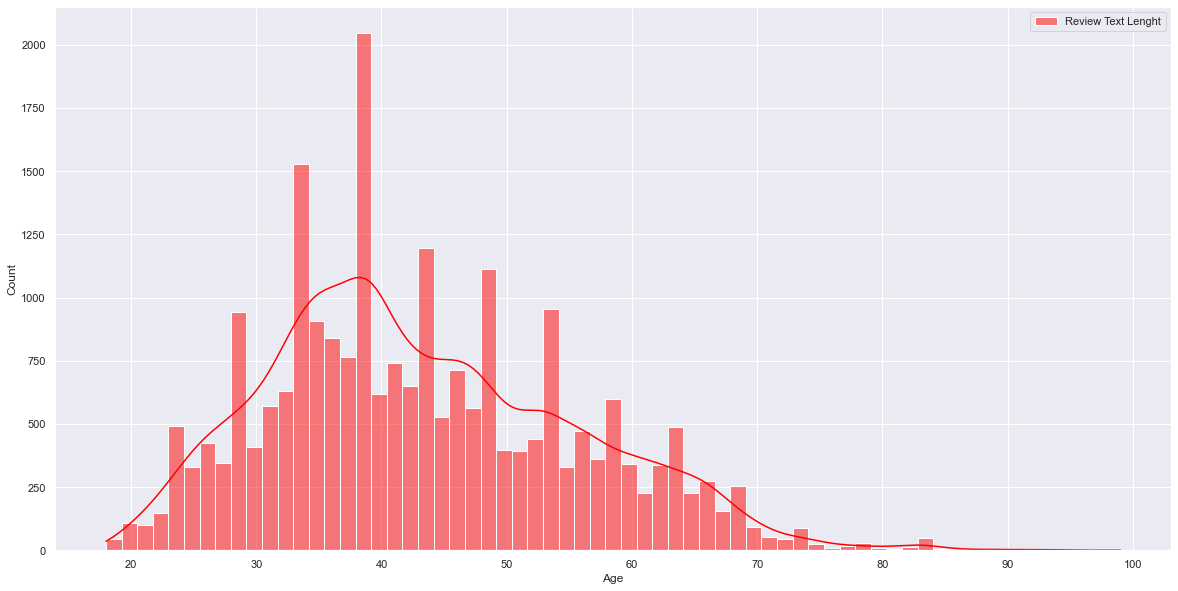

In [181]:
sns.histplot(data=df_new, x=df_new['Age'], color="red", label="Review Text Lenght", kde=True)
plt.legend() 
plt.show()

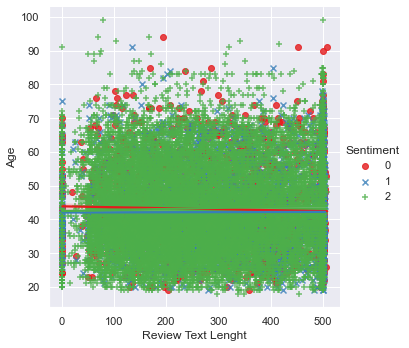

In [209]:
sns.lmplot(x='Review Text Lenght', y='Age', hue='Sentiment', data=df_new,markers=["o", "x", "+"], palette="Set1");
plt.show()

<Figure size 1080x576 with 0 Axes>

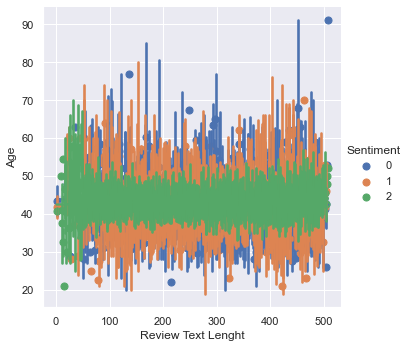

In [196]:
sns.lmplot(x='Review Text Lenght', y='Age', hue='Sentiment', data=df_new, x_estimator=np.mean);
plt.show()

### Conclusion

- There doesnt appear to be any direct correclation between sentiment and age group.
- There doesnt appear to be any direct correlation between sentiment and review text lenght.
- There doesnt appear to be any direct correlation between age and review text lenght.

Each category represents a wide range. The only noticeable trend is that majority of reviews are left by age groups of between 25-65 years old. This represents the range of shoppers we would expect the business to have and there is no noticeable correlations between these three features. 

# Data Preparation

## Checking for outliers

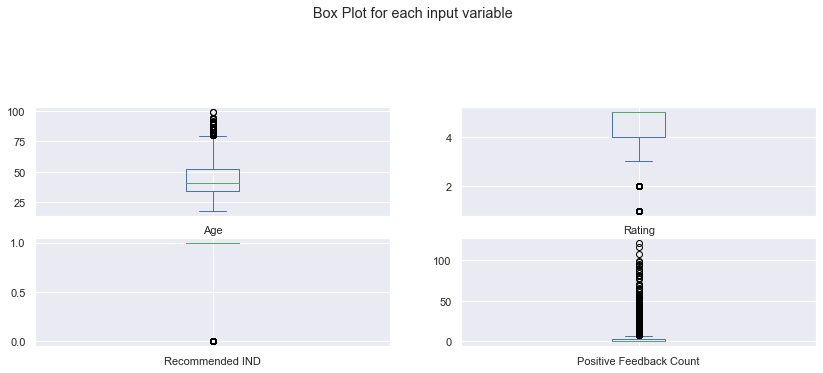

In [42]:
df1.plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(14,14), title='Box Plot for each input variable')
plt.show()

- Even though we can see that our dataset does have quite a lot outliers, they are all important and relatable (e.g. Age, Rating, etc), therefore we will keep it as it is.

In [43]:
df1

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,Blouses
...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,Dresses
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,Knits
23483,31,"This fit well, but the top was very see throug...",3,0,1,Dresses
23484,28,I bought this dress for a wedding i have this ...,3,1,2,Dresses


- In our data preparation, there are a few steps to follow such as scaling and encoding our data, as well as perform feature engineering. The last thing we need to do is to split our data and then we should be ready for the next part, which is machine learning.

In [44]:
df1.isna().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Class Name                 0
dtype: int64

## Feature engineering

- We need to find the lenght of the review text

In [45]:
# Adding a review text word count feature
df1["Review Text Lenght"] = df1['Review Text'].str.len()
df1

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Review Text Lenght
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,53
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,303
2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,500
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants,124
4,47,This shirt is very flattering to all due to th...,5,1,6,Blouses,192
...,...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,Dresses,131
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,Knits,223
23483,31,"This fit well, but the top was very see throug...",3,0,1,Dresses,208
23484,28,I bought this dress for a wedding i have this ...,3,1,2,Dresses,427


- We need to have an understanding of sentiment when reviews are being left by customer.
- We will create a new feature called Sentiment which will represent if a rating is positive or negative.

In [46]:
df1['Sentiment'] = df1['Rating'].map({5:2, 4:2, 3:1, 2:0, 1:0 })
df1

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Class Name,Review Text Lenght,Sentiment
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,53,2
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,Dresses,303,2
2,60,I had such high hopes for this dress and reall...,3,0,0,Dresses,500,1
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,Pants,124,2
4,47,This shirt is very flattering to all due to th...,5,1,6,Blouses,192,2
...,...,...,...,...,...,...,...,...
23481,34,I was very happy to snag this dress at such a ...,5,1,0,Dresses,131,2
23482,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,Knits,223,1
23483,31,"This fit well, but the top was very see throug...",3,0,1,Dresses,208,1
23484,28,I bought this dress for a wedding i have this ...,3,1,2,Dresses,427,1


- 2 for Positive
- 1 for Neutral
- 0 for Negative

## Encoding Data

- We need to use label encoder for the class name before running it through the model

In [47]:
# Data Encoding
df_new = df1[['Review Text Lenght', 'Class Name', 'Age', 'Recommended IND', 'Positive Feedback Count', 'Rating', 'Sentiment']]
df_new

,Review Text Lenght,Class Name,Age,Recommended IND,Positive Feedback Count,Rating,Sentiment
0,53,Intimates,33,1,0,4,2
1,303,Dresses,34,1,4,5,2
2,500,Dresses,60,0,0,3,1
3,124,Pants,50,1,0,5,2
4,192,Blouses,47,1,6,5,2
...,...,...,...,...,...,...,...
23481,131,Dresses,34,1,0,5,2
23482,223,Knits,48,1,0,3,1
23483,208,Dresses,31,0,1,3,1
23484,427,Dresses,28,1,2,3,1


## Label Encoding

In [48]:
# Importing Library
from sklearn.preprocessing import LabelEncoder

In [49]:
# Running the label encoder 
le = LabelEncoder()

df_new['Class Name'] = le.fit_transform(df_new['Class Name'])
df_new

,Review Text Lenght,Class Name,Age,Recommended IND,Positive Feedback Count,Rating,Sentiment
0,53,5,33,1,0,4,2
1,303,3,34,1,4,5,2
2,500,3,60,0,0,3,1
3,124,13,50,1,0,5,2
4,192,0,47,1,6,5,2
...,...,...,...,...,...,...,...
23481,131,3,34,1,0,5,2
23482,223,8,48,1,0,3,1
23483,208,3,31,0,1,3,1
23484,427,3,28,1,2,3,1


In [50]:
# How the Class Name was mapped
dict(zip(le.classes_,range(len(le.classes_))))

{'Blouses': 0,
 'Casual bottoms': 1,
 'Chemises': 2,
 'Dresses': 3,
 'Fine gauge': 4,
 'Intimates': 5,
 'Jackets': 6,
 'Jeans': 7,
 'Knits': 8,
 'Layering': 9,
 'Legwear': 10,
 'Lounge': 11,
 'Outerwear': 12,
 'Pants': 13,
 'Shorts': 14,
 'Skirts': 15,
 'Sleep': 16,
 'Sweaters': 17,
 'Swim': 18,
 'Trend': 19}

- There is no need for us to impute the data as they are all in the same range

## Splitting our dataset

- The very last thing for us to do is the split our dataset and then we are ready to run some machine learning algoritms

In [51]:
df_new

,Review Text Lenght,Class Name,Age,Recommended IND,Positive Feedback Count,Rating,Sentiment
0,53,5,33,1,0,4,2
1,303,3,34,1,4,5,2
2,500,3,60,0,0,3,1
3,124,13,50,1,0,5,2
4,192,0,47,1,6,5,2
...,...,...,...,...,...,...,...
23481,131,3,34,1,0,5,2
23482,223,8,48,1,0,3,1
23483,208,3,31,0,1,3,1
23484,427,3,28,1,2,3,1


# Machine Learning

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import GridSearchCV

In [53]:
# Initializing empty lists to store results for visualization & comparison of model results
Label = []
Test = []
Train = []
Std = []
Cfm = []

In [54]:
# Feature Selection
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values

 
0.05 % Split
 
Testing accuracy =  0.8909710391822828
Training accuracy =  0.893263969862768
Standard Deviation =  0.0022929306804851946
 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       118
           1       0.57      0.36      0.45       137
           2       0.92      0.98      0.95       919

    accuracy                           0.89      1174
   macro avg       0.78      0.72      0.75      1174
weighted avg       0.88      0.89      0.88      1174

AxesSubplot(0.125,0.125;0.775x0.755)


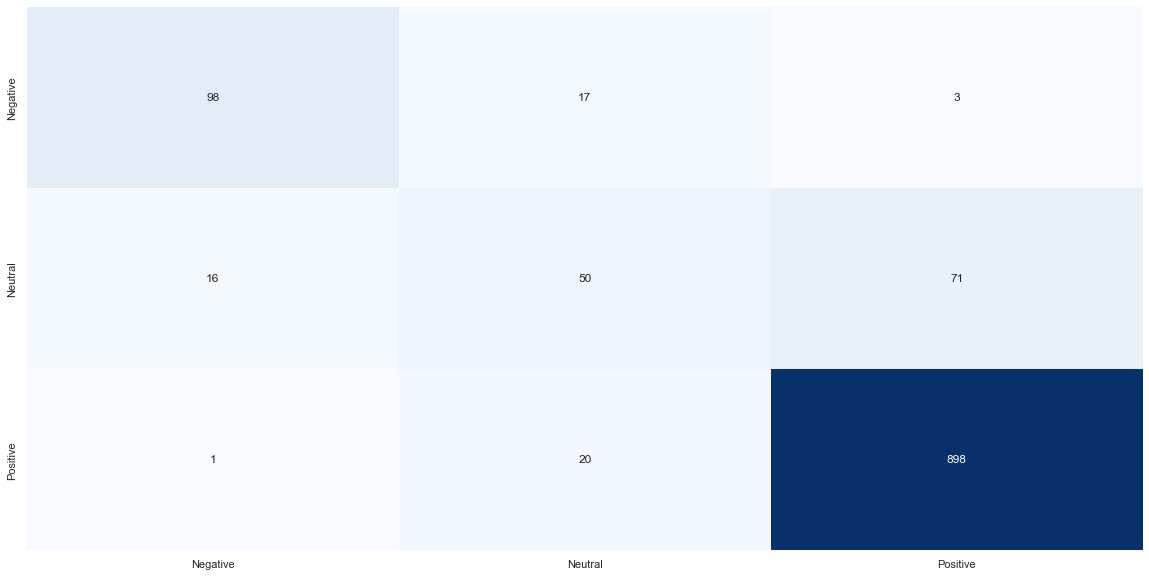

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 
 
0.1 % Split
 
Testing accuracy =  0.8875638841567292
Training accuracy =  0.8893675440257527
Standard Deviation =  0.0018036598690235328
 
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       251
           1       0.54      0.41      0.46       274
           2       0.93      0.97      0.95      1823

    accuracy                           0.89      2348
   macro avg       0.78      0.73      0.75      2348
weighted avg       0.88      0.89      0.88      2348

AxesSubplot(0.125,0.125;0.775x0.755)


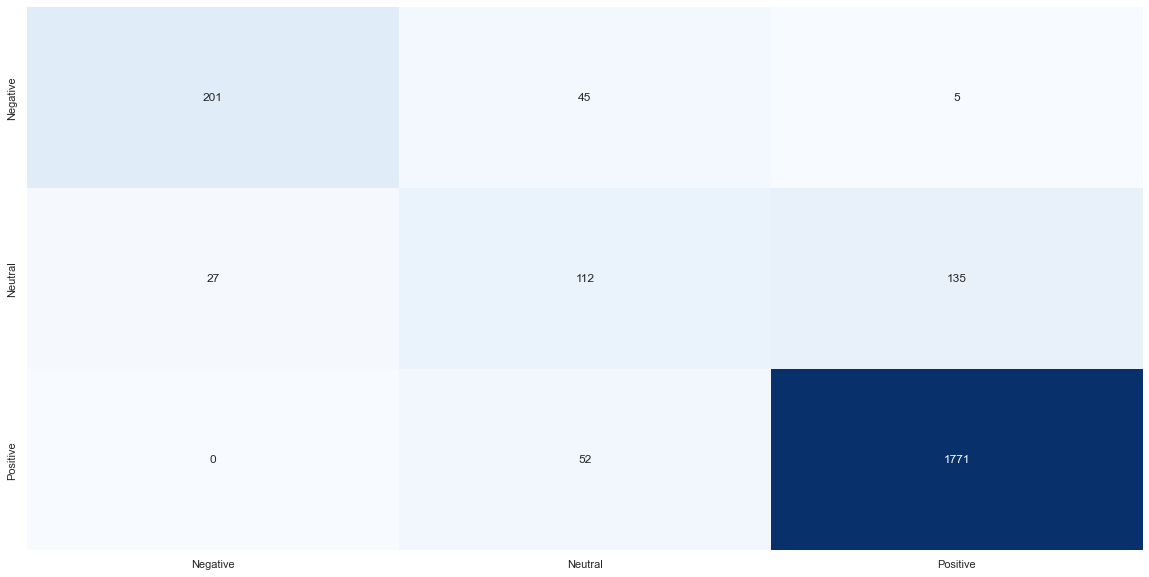

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 
 
0.15 % Split
 
Testing accuracy =  0.8866799204771372
Training accuracy =  0.8871735752593854
Standard Deviation =  0.0004936547822482762
 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       368
           1       0.60      0.35      0.44       432
           2       0.91      0.99      0.95      2721

    accuracy                           0.89      3521
   macro avg       0.79      0.70      0.74      3521
weighted avg       0.87      0.89      0.87      3521

AxesSubplot(0.125,0.125;0.775x0.755)


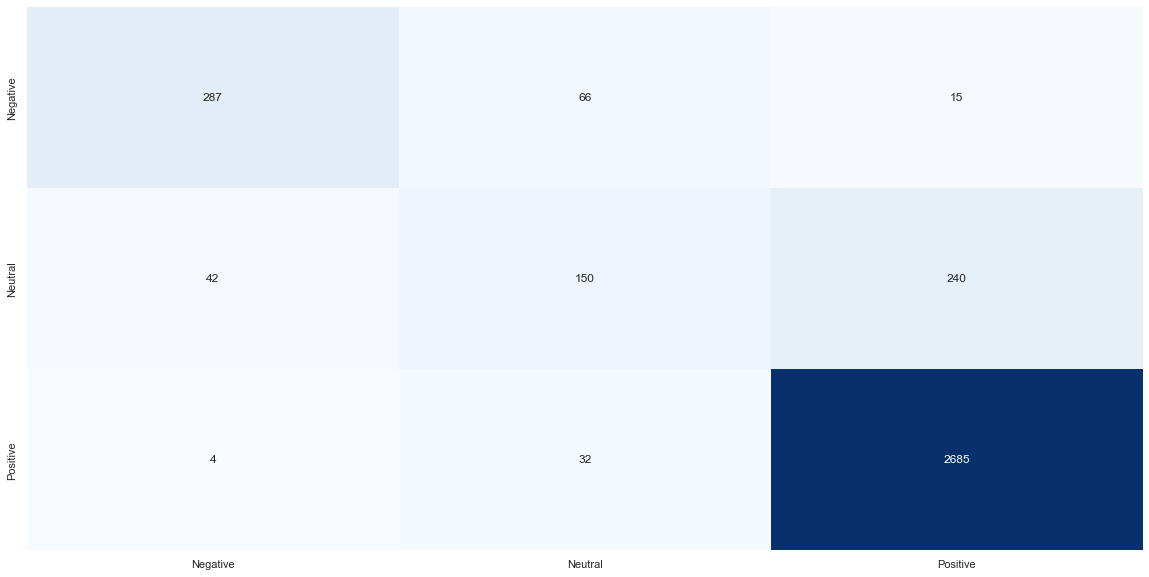

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 
 
0.2 % Split
 
Testing accuracy =  0.9079872204472843
Training accuracy =  0.9127656175107844
Standard Deviation =  0.004778397063500139
 
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       490
           1       0.70      0.49      0.58       595
           2       0.94      0.99      0.96      3610

    accuracy                           0.91      4695
   macro avg       0.83      0.77      0.79      4695
weighted avg       0.90      0.91      0.90      4695

AxesSubplot(0.125,0.125;0.775x0.755)


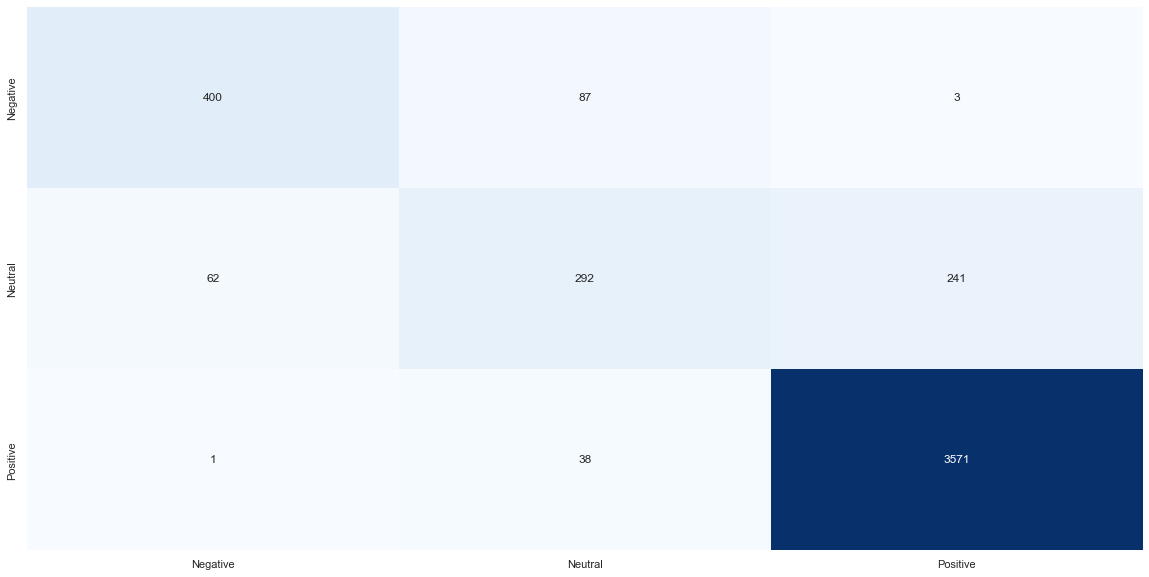

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 
 
0.25 % Split
 
Testing accuracy =  0.8803680981595092
Training accuracy =  0.8833787775505567
Standard Deviation =  0.0030106793910474883
 
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       604
           1       0.54      0.40      0.46       721
           2       0.92      0.98      0.95      4543

    accuracy                           0.88      5868
   macro avg       0.77      0.70      0.73      5868
weighted avg       0.87      0.88      0.87      5868

AxesSubplot(0.125,0.125;0.775x0.755)


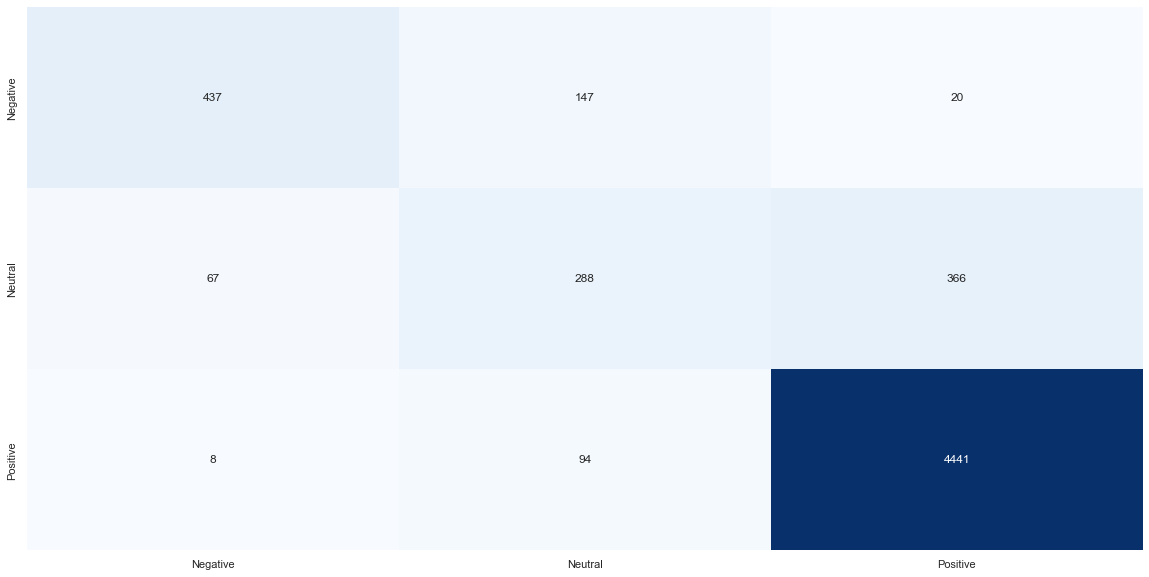

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 
 
0.3 % Split
 
Testing accuracy =  0.8805737006532235
Training accuracy =  0.8842361533779671
Standard Deviation =  0.0036624527247436367
 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       718
           1       0.57      0.33      0.42       871
           2       0.92      0.98      0.95      5453

    accuracy                           0.88      7042
   macro avg       0.76      0.70      0.72      7042
weighted avg       0.86      0.88      0.87      7042

AxesSubplot(0.125,0.125;0.775x0.755)


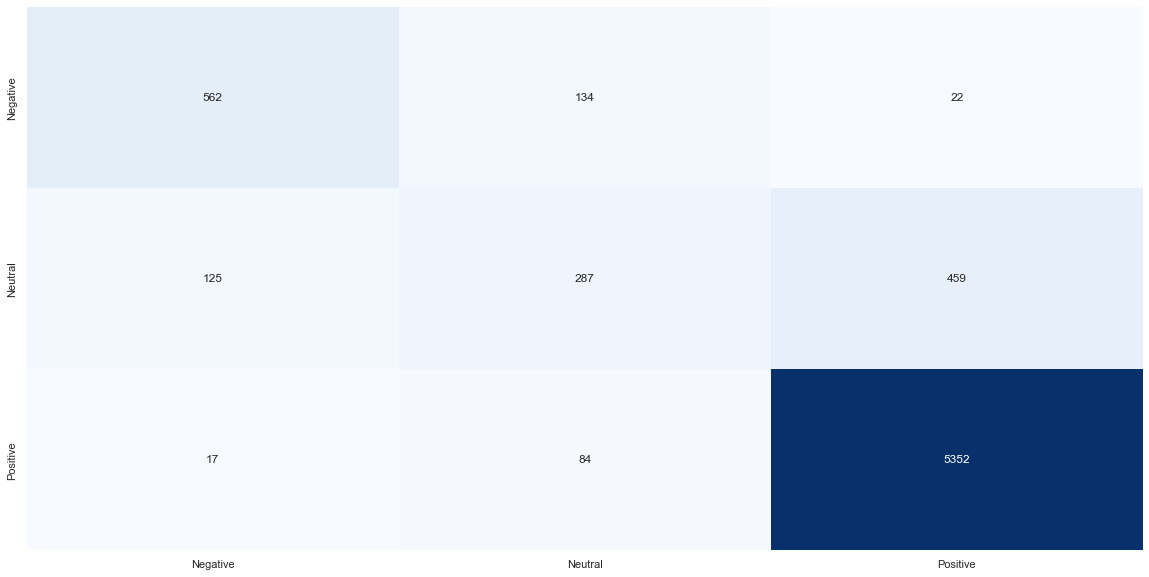

__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
 


In [55]:
# Storing the split data into a list to test all split sizes and compare results to find optimal split size
test_range = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]


for i,t in enumerate(test_range[0:]):
    
    print(" ")
    print(t , "% Split")
    print(" ")
    # Splitting + fitting data to model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, random_state=1, shuffle=True)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # Results 
    lr_test = metrics.accuracy_score(y_test, logreg.predict(X_test))
    print("Testing accuracy = ",lr_test)  
    lr_train = metrics.accuracy_score(y_train, logreg.predict(X_train))
    print("Training accuracy = ",lr_train)
    lr_std = lr_train - lr_test
    print("Standard Deviation = ", lr_std)
    
    # Append results to list
    Label.append(str(int(t*100)) + '% Split')
    Test.append(lr_test)
    Train.append(lr_test)
    Std.append(lr_std)
    

    # Scoring Confusion Matrix Function
    # Iterate through confusion matrix, every 4th cell is positive prediction and the others are errors
    predicted_values = logreg.predict(X_test)    
    ex = pd.DataFrame(confusion_matrix(y_test, predicted_values))
    count = 0
    score = 0
    for i in range(ex.shape[0]): #iterate over rows
        for j in range(ex.shape[1]): #iterate over columns
            if count == 0:
                score = score + int(ex.at[i, j]) # add cell value
                count = 3
            else: 
                score = score - int(ex.at[i, j]) # minus cell value
                count -= 1
    
    cfm_final =  (score / len(y_test)) * 100
    Cfm.append(float('%.2f' % cfm_final))
        
        
    # Printing Results
    print(" ")
    print(classification_report(y_test, predicted_values))
    print(sns.heatmap(confusion_matrix(y_test, predicted_values), annot=True, fmt='0.4g',                 
                 xticklabels=['Negative','Neutral', 'Positive'],                
                 yticklabels=['Negative','Neutral', 'Positive'],                  
                 cbar=False, cmap='Blues'))

    plt.show()
    
    print("__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __")
    print(" ")

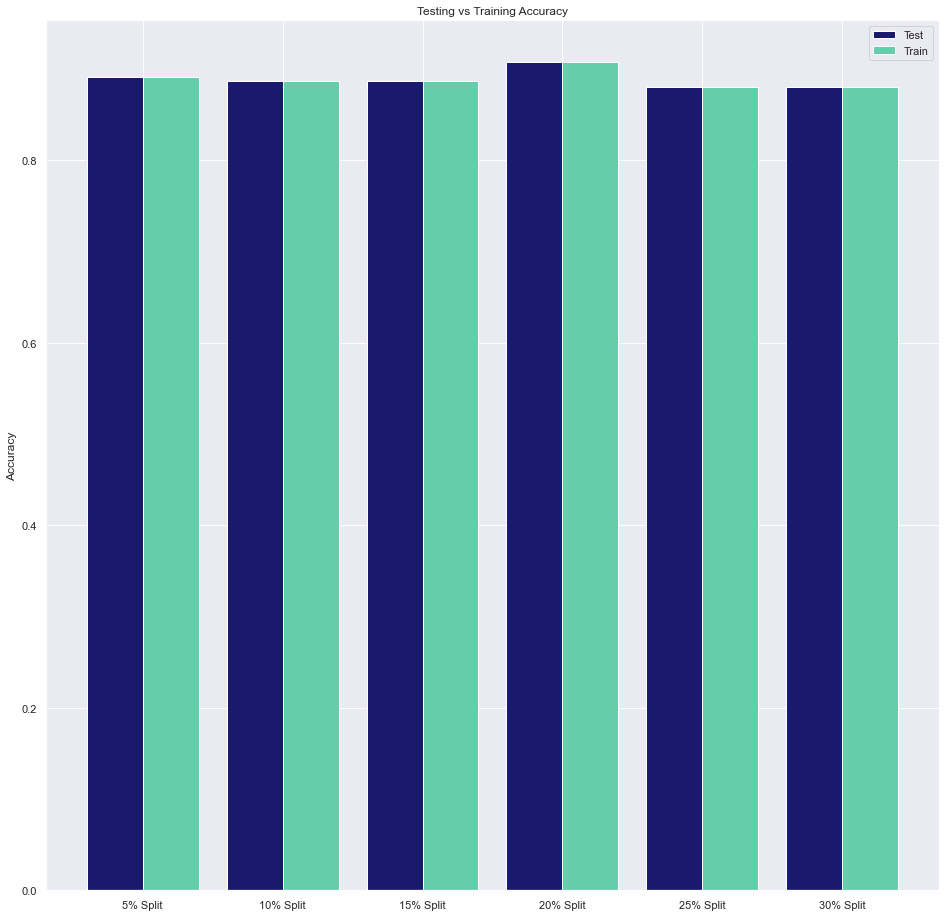

In [56]:
# Plotting Testing vs. Training Results

f, ax = plt.subplots(figsize=(16,16)) 
X_axis = np.arange(len(Label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('midnightblue'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('mediumaquamarine'))

plt.xticks(X_axis, Label)
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Percentage Deviation in Testing Data vs. Training Data')

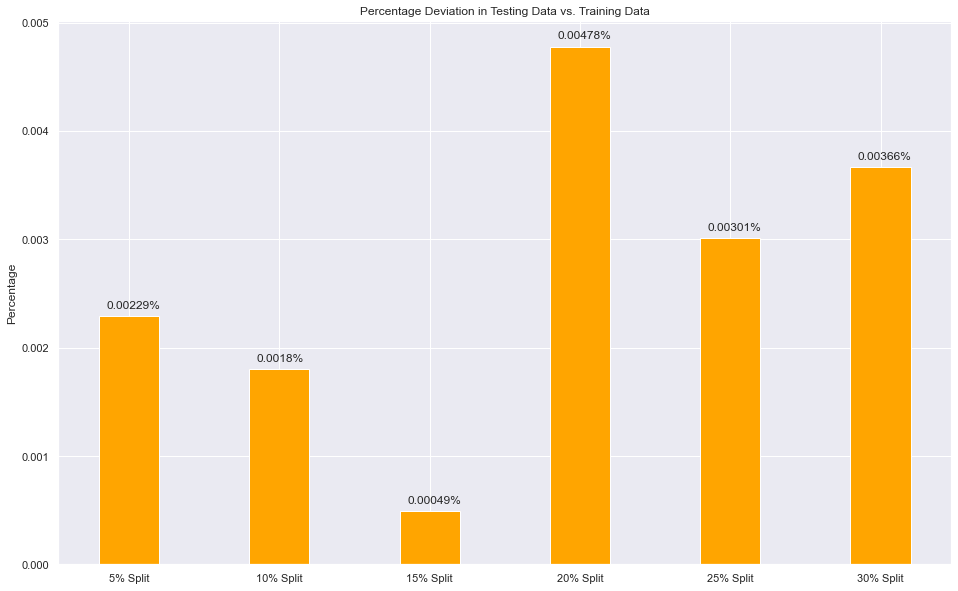

In [57]:
f, ax = plt.subplots(figsize=(16,10)) 
plt.bar(X_axis, Std, 0.4, label = 'std', color=('orange'))

for i, v in enumerate(Std):
    plt.text( i - 0.15, v + 0.0001, str(round(v, 5)) + "%", va="center")

plt.xticks(X_axis, Label)
plt.ylabel("Percentage")
plt.title("Percentage Deviation in Testing Data vs. Training Data")

- From the results we can see that the 20% split scored the highest accuracy in the testing and training set.
- The orange plot highlights the deviation in the data from the testing and training results. We can see that a 15% split scored the lowest deviation while 20% scored the highest. This might suggest that the 20% split size might be suffering from overfitting issues while a 15% split size is more capable of generalizing to new data from the testing set.
- In order to conclude the best split size I will need to observe view the confusion matrix and score the results.

### Confusion Matrix Error Scoring

- The scoring system is simple. Each succesful prediction is +1 point, an error is -1 point
- As each testing size varies in size ie: 5% vs 25%  testing sample size, the final score will need to be scored as a percentage of its overall sample size so as to not bias a larger sample size score.
- Our scoring system does not have any bias for type I or type II error. This is because we just want to predict the sentiment correctly, we are not looking to maximize a specific dependant feature.

Text(0.5, 1.0, 'Confusion Matrix Score (Higher is better)')

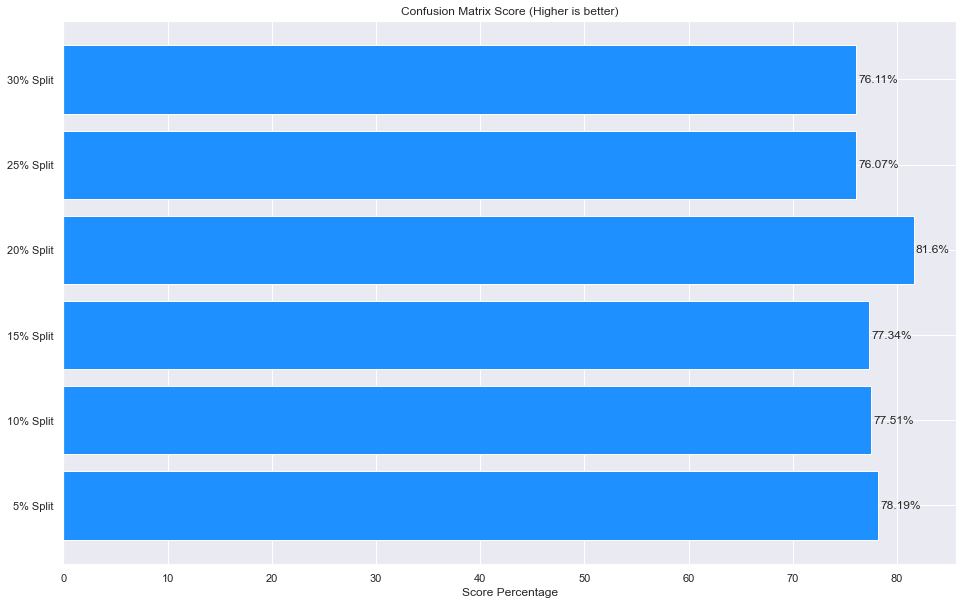

In [58]:
# Confusion Matrix Score converted to an accuracy score based on percentage of its testing size 
# Each testing group varies in size. I cannot compare a pure score value of a smaller testing sample size to a larger sample size.
# As such I take their score and divide it by the total size of the testing sample size and multiply by 100 for a percentage score value

f, ax = plt.subplots(figsize=(16,10)) 
ax.barh(X_axis, Cfm, color=('dodgerblue'))

for i, v in enumerate(Cfm):
    plt.text(v+0.2, i , str(round(v, 2)) + "%", va="center")


plt.yticks(X_axis, Label)
plt.xlabel("Score Percentage")
plt.title("Confusion Matrix Score (Higher is better)")

- The results indicate that 20% split would be optimal due to higher accuracy. while it may represent the results with the highest standard deviation between testing and training set results these results are marginal at only 0.0047%.
- 20% test split also scored the highest confusion matrix score value, this is to be expected as we did not bias any type I or type II errors.

### Cross Validation

In [59]:
# Performing Cross validation
# Cross validation score (Logistic Regression)
score = cross_val_score(logreg, X, y, cv=7)
print('Cross validation score: ',score)

Cross validation score:  [0.88193202 0.87951089 0.87623024 0.87652848 0.89114226 0.88189681
 0.88219505]


In [60]:
# Mean accuracy score
score.mean()

0.8813479642102396

</br>

### Optimizing Model

In [61]:
# initialising lists of hyperparameters to test for the optimal settings
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none','l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [62]:
# Using GridSearchCV to test for hyperparameter setting
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

In [63]:
# Printing out the optimal hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 1.000000 using {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}


### Run The Optimized Model

In [64]:
# Initialise logreg model with optimised hyperparameters & fitting the data
logreg = LogisticRegression(C=100, penalty='none', solver='newton-cg')
logreg.fit(X_train, y_train)

# Generating prediction
predicted_values = logreg.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       718
           1       1.00      1.00      1.00       871
           2       1.00      1.00      1.00      5453

    accuracy                           1.00      7042
   macro avg       1.00      1.00      1.00      7042
weighted avg       1.00      1.00      1.00      7042

AxesSubplot(0.125,0.125;0.775x0.755)


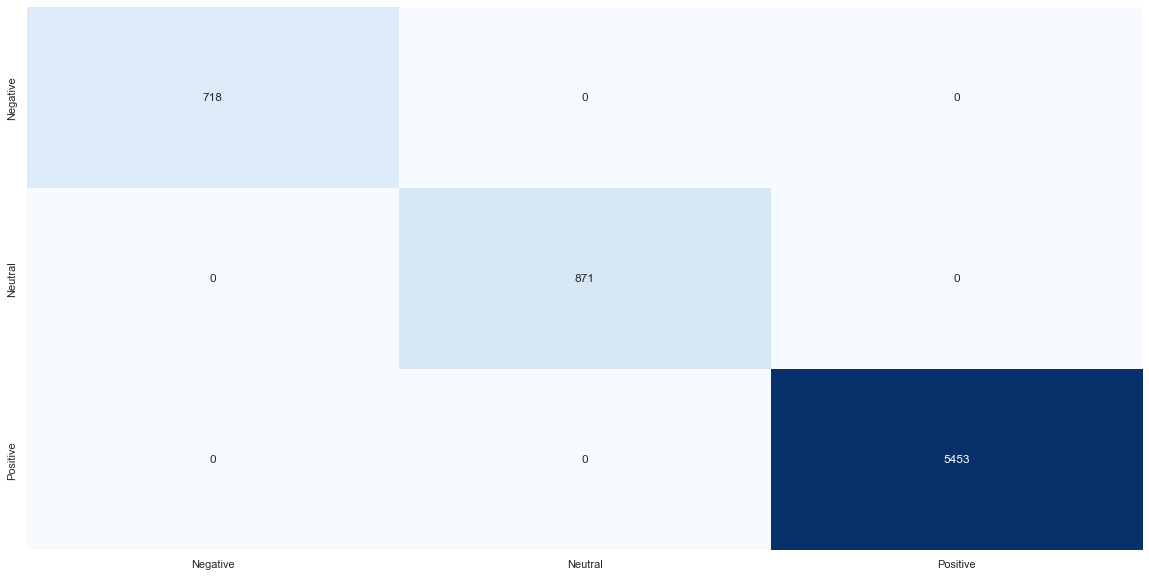

In [65]:
print(classification_report(y_test, predicted_values))
print(sns.heatmap(confusion_matrix(y_test, predicted_values), annot=True, fmt='.4g',                 
                 xticklabels=['Negative','Neutral', 'Positive'],                
                 yticklabels=['Negative','Neutral', 'Positive'],                  
                 cbar=False, cmap='Blues'))

In [66]:
#Print Train Accuracy
lr_train_accuracy = metrics.accuracy_score(y_train, logreg.predict(X_train))
print("Training accuracy = ",metrics.accuracy_score(y_train, logreg.predict(X_train)))

#Print Test Accuracy
lr_test_accuracy = metrics.accuracy_score(y_test, logreg.predict(X_test))
print("Testing accuracy = ",metrics.accuracy_score(y_test, logreg.predict(X_test)))

Training accuracy =  1.0
Testing accuracy =  1.0


In [67]:
# Performing Cross validation
# Cross validation score (Logistic Regression)
score = cross_val_score(logreg, X, y, cv=5)
print('Cross validation score: ',score)

Cross validation score:  [1. 1. 1. 1. 1.]


In [68]:
# Mean accuracy score
score.mean()

1.0

- Using optimal test sample size and optimizing the logistic regression model for the best hyperparameters we are able to achieve 100% accuracy with logistic regression. Allowing us to Accurately predict sentiment based on review feedback, irrespective of the content of the feedback itself.

Next I would like to investigate if there is a correlation between review text lenght and sentiment. Understanding if longer review text correlates with a strong sentiment or not.